<span style="color:gray; font-weight: bold">Editor:</span> <span style="color:gray; font-weight: bold; font-style: italic">Dar Lador, she codes;</span>

In [2]:
%matplotlib inline
from pandas import *
import pandas
import numpy as np
import matplotlib.pyplot as plt

def side_by_side(*objs, **kwds):
    from pandas.io.formats.printing import adjoin
    space = kwds.get('space', 4)
    reprs = [repr(obj).split('\n') for obj in objs]
    print(adjoin(space, *reprs))

plt.rc('figure', figsize=(10, 6))
# pandas.set_printoptions(notebook_repr_html=False)

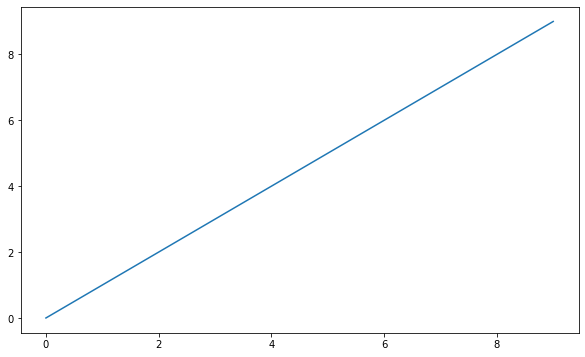

In [3]:
plt.plot(np.arange(10))
plt.show()

Series
======

In [4]:
np.random.randn(5)

array([ 0.48004199, -1.85890707,  0.31624152, -0.58464568,  0.50491473])

In [5]:
labels = ['a', 'b', 'c', 'd', 'e']
s = Series(np.random.randn(5), index=labels)
s

a    2.042817
b    0.806559
c    0.292965
d   -0.899886
e   -0.727555
dtype: float64

In [6]:
'b' in s

True

In [7]:
s.index


Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [8]:
s['b']

0.8065590454728794

In [9]:
s.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [10]:
s

a    2.042817
b    0.806559
c    0.292965
d   -0.899886
e   -0.727555
dtype: float64

In [11]:
mapping = s.to_dict()    # converted the series to a dictionary
mapping

{'a': 2.042816654208328,
 'b': 0.8065590454728794,
 'c': 0.29296458585622787,
 'd': -0.8998862576452265,
 'e': -0.7275550002823827}

In [12]:
s = Series(mapping, index=['b', 'e', 'a', 'd', 'f'])    # Create a series from a distionary
s

b    0.806559
e   -0.727555
a    2.042817
d   -0.899886
f         NaN
dtype: float64

In [13]:
s[notnull(s)]    # selects the data where it's NOT null

b    0.806559
e   -0.727555
a    2.042817
d   -0.899886
dtype: float64

In [14]:
s[isnull(s)]    # selects the data where it IS  null

f   NaN
dtype: float64

In [15]:
s.dropna()

b    0.806559
e   -0.727555
a    2.042817
d   -0.899886
dtype: float64

In [16]:
s * 2

b    1.613118
e   -1.455110
a    4.085633
d   -1.799773
f         NaN
dtype: float64

In [17]:
s[:3]

b    0.806559
e   -0.727555
a    2.042817
dtype: float64

In [18]:
s.index

Index(['b', 'e', 'a', 'd', 'f'], dtype='object')

DataFrame: 2D collection of Series
==================================

In [19]:
df = DataFrame({'a': np.random.randn(6),
                'b': ['foo', 'bar'] * 3,
                'c': np.random.randn(6)})
df['d'] = range(6)       # assign a new value (new column)
df

,a,b,c,d
0,1.289758,foo,1.165583,0
1,0.417469,bar,-0.498545,1
2,0.501690,foo,-1.428760,2
3,0.332520,bar,0.325269,3
4,1.405340,foo,-0.104672,4
5,-0.823318,bar,1.931818,5


In [20]:
df['b']    # by column

0    foo
1    bar
2    foo
3    bar
4    foo
5    bar
Name: b, dtype: object

In [21]:
df[:3]     # 3 first rows

,a,b,c,d
0,1.289758,foo,1.165583,0
1,0.417469,bar,-0.498545,1
2,0.501690,foo,-1.428760,2


In [22]:
df[:-2]

,a,b,c,d
0,1.289758,foo,1.165583,0
1,0.417469,bar,-0.498545,1
2,0.501690,foo,-1.428760,2
3,0.332520,bar,0.325269,3


In [24]:
df[-2:]   # the last 2 rows

,a,b,c,d
4,1.405340,foo,-0.104672,4
5,-0.823318,bar,1.931818,5


In [25]:
np.tile(['foo', 'bar'], 3)   # in numpy

array(['foo', 'bar', 'foo', 'bar', 'foo', 'bar'], dtype='<U3')

In [23]:
df.xs(0)   # returning the first row

a    1.289758
b         foo
c    1.165583
d           0
Name: 0, dtype: object

In [26]:
df.loc[2]    # does equal thing as above. In this case, 3rd row. 

a    0.50169
b        foo
c   -1.42876
d          2
Name: 2, dtype: object

In [27]:
df.loc[2, 'b']     #returns the 3rd row of column b

'foo'

In [28]:
df.at[2, 'b']

'foo'

In [30]:
timeit df.loc[2, 'b']

6.27 µs ± 177 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [31]:
timeit df.at[2, 'b']

3.36 µs ± 106 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [32]:
df.loc[2:4, 'b']

2    foo
3    bar
4    foo
Name: b, dtype: object

In [33]:
df.loc[2:4, ['b', 'c']]

,b,c
2,foo,-1.428760
3,bar,0.325269
4,foo,-0.104672


In [34]:
df.loc[2:4, 'b':'c']   # slices by column - essentially the same as above.

,b,c
2,foo,-1.428760
3,bar,0.325269
4,foo,-0.104672


In [35]:
df.loc[[0, 2, 4], ['b', 'c', 'd']]   # pass a list of rows and columns I want to select out

,b,c,d
0,foo,1.165583,0
2,foo,-1.428760,2
4,foo,-0.104672,4


In [36]:
df['c'] > 0    # boolean arrays

0     True
1    False
2    False
3     True
4    False
5     True
Name: c, dtype: bool

In [37]:
df.loc[df['c'] > 0]   # slice the data for the columns

,a,b,c,d
0,1.289758,foo,1.165583,0
3,0.332520,bar,0.325269,3
5,-0.823318,bar,1.931818,5


In [40]:
df.index

RangeIndex(start=0, stop=6, step=1)

In [39]:
df.columns

Index(['a', 'b', 'c', 'd'], dtype='object')

In [41]:
df = DataFrame({'a': np.random.randn(6),
                'b': ['foo', 'bar'] * 3,
                'c': np.random.randn(6)},
               index=date_range('1/1/2000', periods=6))
df

,a,b,c
2000-01-01,0.865709,foo,-0.080414
2000-01-02,0.697032,bar,-0.181795
2000-01-03,0.679289,foo,-0.099257
2000-01-04,-1.194181,bar,0.759567
2000-01-05,0.278101,foo,-2.005166
2000-01-06,-0.137053,bar,-0.448781


In [42]:
df = DataFrame({'a': np.random.randn(6),
                'b': ['foo', 'bar'] * 3,
                'c': np.random.randn(6)},
               columns=['a', 'b', 'c', 'd'])
df

,a,b,c,d
0,1.690216,foo,-0.226611,NaN
1,0.680119,bar,-1.085267,NaN
2,0.469679,foo,-1.001021,NaN
3,0.259261,bar,-0.426079,NaN
4,0.534437,foo,-1.314918,NaN
5,1.821211,bar,0.270191,NaN


In [43]:
isnull(df)

,a,b,c,d
0,False,False,False,True
1,False,False,False,True
2,False,False,False,True
3,False,False,False,True
4,False,False,False,True
5,False,False,False,True


Creation from nested dicts
--------------------------

These arise naturally in Python code

In [44]:
data = {}          # a distionary
for col in ['foo', 'bar', 'baz']:
    for row in ['a', 'b', 'c', 'd']:
        data.setdefault(col, {})[row] = np.random.randn()   # sorted cols: bar, baz, foo
data

{'foo': {'a': 0.2038328534057644,
  'b': 1.6839095885744002,
  'c': 1.4807628625911249,
  'd': -0.38448958921803145},
 'bar': {'a': -0.5058160812352158,
  'b': -1.482628085385487,
  'c': -1.0633426913118136,
  'd': -0.7279523069550279},
 'baz': {'a': 0.8346592833109127,
  'b': -1.1090443976489233,
  'c': 0.4645982229506452,
  'd': -0.6774573248915275}}

In [45]:
DataFrame(data)     # creates a dataframe from the distionary

,foo,bar,baz
a,0.203833,-0.505816,0.834659
b,1.683910,-1.482628,-1.109044
c,1.480763,-1.063343,0.464598
d,-0.384490,-0.727952,-0.677457


In [46]:
del data['foo']['c']   # delete an entry by index key (col) and row.

In [47]:
DataFrame(data)   # pass a dict 

,foo,bar,baz
a,0.203833,-0.505816,0.834659
b,1.683910,-1.482628,-1.109044
d,-0.384490,-0.727952,-0.677457
c,NaN,-1.063343,0.464598


Data alignment
==============

In [48]:
close_px = read_csv('stock_data.csv', index_col=0, parse_dates=True)

In [49]:
close_px.head(10)

,AA,AAPL,GE,IBM,JNJ,MSFT,PEP,SPX,XOM
2007-10-29,37.41,185.09,34.46,106.78,57.13,31.78,65.67,1540.98,85.51
2007-10-30,36.43,187.00,34.39,106.15,56.99,32.70,65.80,1531.02,83.25
2007-10-31,36.79,189.95,34.97,108.01,57.30,33.84,65.69,1549.38,84.03
2007-11-01,35.22,187.44,34.27,105.72,56.85,34.07,64.51,1508.44,80.84
2007-11-02,35.83,187.87,34.27,106.59,56.95,34.07,65.03,1509.65,80.32
2007-11-05,35.22,186.18,34.15,105.48,56.70,33.77,64.84,1502.17,80.07
2007-11-06,35.84,191.79,34.14,105.27,56.80,33.47,65.49,1520.27,82.56
2007-11-07,34.76,186.30,33.20,103.69,56.19,32.65,64.46,1475.62,79.96
2007-11-08,35.00,175.47,33.15,99.05,56.79,31.94,65.50,1474.77,82.00
2007-11-09,34.47,165.37,32.61,93.58,57.29,31.01,65.48,1453.70,79.64


In [50]:
close_px

,AA,AAPL,GE,IBM,JNJ,MSFT,PEP,SPX,XOM
2007-10-29,37.41,185.09,34.46,106.78,57.13,31.78,65.67,1540.98,85.51
2007-10-30,36.43,187.00,34.39,106.15,56.99,32.70,65.80,1531.02,83.25
2007-10-31,36.79,189.95,34.97,108.01,57.30,33.84,65.69,1549.38,84.03
2007-11-01,35.22,187.44,34.27,105.72,56.85,34.07,64.51,1508.44,80.84
2007-11-02,35.83,187.87,34.27,106.59,56.95,34.07,65.03,1509.65,80.32
...,...,...,...,...,...,...,...,...,...
2011-10-10,10.09,388.81,16.14,186.62,64.43,26.94,61.87,1194.89,76.28
2011-10-11,10.30,400.29,16.14,185.00,63.96,27.00,60.95,1195.54,76.27
2011-10-12,10.05,402.19,16.40,186.12,64.33,26.96,62.70,1207.25,77.16
2011-10-13,10.10,408.43,16.22,186.82,64.23,27.18,62.36,1203.66,76.37


In [51]:
s1 = close_px['AAPL'][-20:]      # the last 20 rows
s2 = close_px['AAPL'][-25:-10]   # the last 25 - last 10 = 15 rows.
side_by_side(s1, s2)     # הצגת הנתונים זה ליד זה

2011-09-19    411.63          2011-09-12    379.94      
2011-09-20    413.45          2011-09-13    384.62      
2011-09-21    412.14          2011-09-14    389.30      
2011-09-22    401.82          2011-09-15    392.96      
2011-09-23    404.30          2011-09-16    400.50      
2011-09-26    403.17          2011-09-19    411.63      
2011-09-27    399.26          2011-09-20    413.45      
2011-09-28    397.01          2011-09-21    412.14      
2011-09-29    390.57          2011-09-22    401.82      
2011-09-30    381.32          2011-09-23    404.30      
2011-10-03    374.60          2011-09-26    403.17      
2011-10-04    372.50          2011-09-27    399.26      
2011-10-05    378.25          2011-09-28    397.01      
2011-10-06    377.37          2011-09-29    390.57      
2011-10-07    369.80          2011-09-30    381.32      
2011-10-10    388.81          Name: AAPL, dtype: float64
2011-10-11    400.29                                    
2011-10-12    402.19           

In [52]:
s1 + s2      #חיבור הנתונים בשורות עם אותו התאריך

2011-09-12       NaN
2011-09-13       NaN
2011-09-14       NaN
2011-09-15       NaN
2011-09-16       NaN
2011-09-19    823.26
2011-09-20    826.90
2011-09-21    824.28
2011-09-22    803.64
2011-09-23    808.60
2011-09-26    806.34
2011-09-27    798.52
2011-09-28    794.02
2011-09-29    781.14
2011-09-30    762.64
2011-10-03       NaN
2011-10-04       NaN
2011-10-05       NaN
2011-10-06       NaN
2011-10-07       NaN
2011-10-10       NaN
2011-10-11       NaN
2011-10-12       NaN
2011-10-13       NaN
2011-10-14       NaN
Name: AAPL, dtype: float64

In [53]:
s1.add(s2, fill_value=0)      # נתונים חסרים יהיו שווים 0

2011-09-12    379.94
2011-09-13    384.62
2011-09-14    389.30
2011-09-15    392.96
2011-09-16    400.50
2011-09-19    823.26
2011-09-20    826.90
2011-09-21    824.28
2011-09-22    803.64
2011-09-23    808.60
2011-09-26    806.34
2011-09-27    798.52
2011-09-28    794.02
2011-09-29    781.14
2011-09-30    762.64
2011-10-03    374.60
2011-10-04    372.50
2011-10-05    378.25
2011-10-06    377.37
2011-10-07    369.80
2011-10-10    388.81
2011-10-11    400.29
2011-10-12    402.19
2011-10-13    408.43
2011-10-14    422.00
Name: AAPL, dtype: float64

In [54]:
(s1 + s2).dropna()

2011-09-19    823.26
2011-09-20    826.90
2011-09-21    824.28
2011-09-22    803.64
2011-09-23    808.60
2011-09-26    806.34
2011-09-27    798.52
2011-09-28    794.02
2011-09-29    781.14
2011-09-30    762.64
Name: AAPL, dtype: float64

In [55]:
df = close_px.iloc[-10:, :3]
df

,AA,AAPL,GE
2011-10-03,8.90,374.60,14.69
2011-10-04,9.12,372.50,14.86
2011-10-05,9.37,378.25,15.27
2011-10-06,9.88,377.37,15.53
2011-10-07,9.71,369.80,15.50
2011-10-10,10.09,388.81,16.14
2011-10-11,10.30,400.29,16.14
2011-10-12,10.05,402.19,16.40
2011-10-13,10.10,408.43,16.22
2011-10-14,10.26,422.00,16.60


In [56]:
side_by_side(s1.reindex(s2.index), s2) 

2011-09-12       NaN          2011-09-12    379.94      
2011-09-13       NaN          2011-09-13    384.62      
2011-09-14       NaN          2011-09-14    389.30      
2011-09-15       NaN          2011-09-15    392.96      
2011-09-16       NaN          2011-09-16    400.50      
2011-09-19    411.63          2011-09-19    411.63      
2011-09-20    413.45          2011-09-20    413.45      
2011-09-21    412.14          2011-09-21    412.14      
2011-09-22    401.82          2011-09-22    401.82      
2011-09-23    404.30          2011-09-23    404.30      
2011-09-26    403.17          2011-09-26    403.17      
2011-09-27    399.26          2011-09-27    399.26      
2011-09-28    397.01          2011-09-28    397.01      
2011-09-29    390.57          2011-09-29    390.57      
2011-09-30    381.32          2011-09-30    381.32      
Name: AAPL, dtype: float64    Name: AAPL, dtype: float64


In [58]:
b, c  = s1.align(s2, join='inner')
side_by_side(b, c)

2011-09-19    411.63          2011-09-19    411.63      
2011-09-20    413.45          2011-09-20    413.45      
2011-09-21    412.14          2011-09-21    412.14      
2011-09-22    401.82          2011-09-22    401.82      
2011-09-23    404.30          2011-09-23    404.30      
2011-09-26    403.17          2011-09-26    403.17      
2011-09-27    399.26          2011-09-27    399.26      
2011-09-28    397.01          2011-09-28    397.01      
2011-09-29    390.57          2011-09-29    390.57      
2011-09-30    381.32          2011-09-30    381.32      
Name: AAPL, dtype: float64    Name: AAPL, dtype: float64


In [59]:
b, c  = s1.align(s2, join='outer')
side_by_side(b, c)

2011-09-12       NaN          2011-09-12    379.94      
2011-09-13       NaN          2011-09-13    384.62      
2011-09-14       NaN          2011-09-14    389.30      
2011-09-15       NaN          2011-09-15    392.96      
2011-09-16       NaN          2011-09-16    400.50      
2011-09-19    411.63          2011-09-19    411.63      
2011-09-20    413.45          2011-09-20    413.45      
2011-09-21    412.14          2011-09-21    412.14      
2011-09-22    401.82          2011-09-22    401.82      
2011-09-23    404.30          2011-09-23    404.30      
2011-09-26    403.17          2011-09-26    403.17      
2011-09-27    399.26          2011-09-27    399.26      
2011-09-28    397.01          2011-09-28    397.01      
2011-09-29    390.57          2011-09-29    390.57      
2011-09-30    381.32          2011-09-30    381.32      
2011-10-03    374.60          2011-10-03       NaN      
2011-10-04    372.50          2011-10-04       NaN      
2011-10-05    378.25          2

In [60]:
b, c  = s1.align(s2, join='right')
side_by_side(b, c)

2011-09-12       NaN          2011-09-12    379.94      
2011-09-13       NaN          2011-09-13    384.62      
2011-09-14       NaN          2011-09-14    389.30      
2011-09-15       NaN          2011-09-15    392.96      
2011-09-16       NaN          2011-09-16    400.50      
2011-09-19    411.63          2011-09-19    411.63      
2011-09-20    413.45          2011-09-20    413.45      
2011-09-21    412.14          2011-09-21    412.14      
2011-09-22    401.82          2011-09-22    401.82      
2011-09-23    404.30          2011-09-23    404.30      
2011-09-26    403.17          2011-09-26    403.17      
2011-09-27    399.26          2011-09-27    399.26      
2011-09-28    397.01          2011-09-28    397.01      
2011-09-29    390.57          2011-09-29    390.57      
2011-09-30    381.32          2011-09-30    381.32      
Name: AAPL, dtype: float64    Name: AAPL, dtype: float64


In [72]:
df =  close_px
df2 = df.loc[::2, ['IBM', 'MSFT']]    # קפיצות של 2 ורק עמודות נבחרות
df2
side_by_side(df, df2)

               AA    AAPL     GE     IBM    JNJ   MSFT    PEP      SPX    XOM                   IBM   MSFT
2007-10-29  37.41  185.09  34.46  106.78  57.13  31.78  65.67  1540.98  85.51    2007-10-29  106.78  31.78
2007-10-30  36.43  187.00  34.39  106.15  56.99  32.70  65.80  1531.02  83.25    2007-10-31  108.01  33.84
2007-10-31  36.79  189.95  34.97  108.01  57.30  33.84  65.69  1549.38  84.03    2007-11-02  106.59  34.07
2007-11-01  35.22  187.44  34.27  105.72  56.85  34.07  64.51  1508.44  80.84    2007-11-06  105.27  33.47
2007-11-02  35.83  187.87  34.27  106.59  56.95  34.07  65.03  1509.65  80.32    2007-11-08   99.05  31.94
...           ...     ...    ...     ...    ...    ...    ...      ...    ...    ...            ...    ...
2011-10-10  10.09  388.81  16.14  186.62  64.43  26.94  61.87  1194.89  76.28    2011-10-03  173.29  24.53
2011-10-11  10.30  400.29  16.14  185.00  63.96  27.00  60.95  1195.54  76.27    2011-10-05  176.85  25.89
2011-10-12  10.05  402.19  16.40  186

In [73]:
df + df2

,AA,AAPL,GE,IBM,JNJ,MSFT,PEP,SPX,XOM
2007-10-29,NaN,NaN,NaN,213.56,NaN,63.56,NaN,NaN,NaN
2007-10-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-10-31,NaN,NaN,NaN,216.02,NaN,67.68,NaN,NaN,NaN
2007-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-11-02,NaN,NaN,NaN,213.18,NaN,68.14,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2011-10-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-10-11,NaN,NaN,NaN,370.00,NaN,54.00,NaN,NaN,NaN
2011-10-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-10-13,NaN,NaN,NaN,373.64,NaN,54.36,NaN,NaN,NaN


In [74]:
b, c = df.align(df2, join='inner')
side_by_side(b, c) 

               IBM   MSFT                   IBM   MSFT
2007-10-29  106.78  31.78    2007-10-29  106.78  31.78
2007-10-31  108.01  33.84    2007-10-31  108.01  33.84
2007-11-02  106.59  34.07    2007-11-02  106.59  34.07
2007-11-06  105.27  33.47    2007-11-06  105.27  33.47
2007-11-08   99.05  31.94    2007-11-08   99.05  31.94
...            ...    ...    ...            ...    ...
2011-10-03  173.29  24.53    2011-10-03  173.29  24.53
2011-10-05  176.85  25.89    2011-10-05  176.85  25.89
2011-10-07  182.39  26.25    2011-10-07  182.39  26.25
2011-10-11  185.00  27.00    2011-10-11  185.00  27.00
2011-10-13  186.82  27.18    2011-10-13  186.82  27.18
                                                      
[500 rows x 2 columns]       [500 rows x 2 columns]   


Transposing: no copy if all columns are same type
-------------------------------------------------

In [75]:
df[:5].T

,2007-10-29,2007-10-30,2007-10-31,2007-11-01,2007-11-02
AA,37.41,36.43,36.79,35.22,35.83
AAPL,185.09,187.00,189.95,187.44,187.87
GE,34.46,34.39,34.97,34.27,34.27
IBM,106.78,106.15,108.01,105.72,106.59
JNJ,57.13,56.99,57.30,56.85,56.95
MSFT,31.78,32.70,33.84,34.07,34.07
PEP,65.67,65.80,65.69,64.51,65.03
SPX,1540.98,1531.02,1549.38,1508.44,1509.65
XOM,85.51,83.25,84.03,80.84,80.32


Columns can be any type
-----------------------

In [76]:
n = 10
foo = DataFrame(index=range(n))
foo['floats'] = np.random.randn(n)
foo['ints'] = np.arange(n)
foo['strings'] = ['foo', 'bar'] * int(n / 2)
foo['bools'] = foo['floats'] > 0
foo['objects'] = date_range('1/1/2000', periods=n)
foo

,floats,ints,strings,bools,objects
0,-0.553533,0,foo,False,2000-01-01
1,-0.943865,1,bar,False,2000-01-02
2,-0.164799,2,foo,False,2000-01-03
3,-1.079240,3,bar,False,2000-01-04
4,2.653347,4,foo,True,2000-01-05
5,0.495066,5,bar,True,2000-01-06
6,0.021687,6,foo,True,2000-01-07
7,-1.304491,7,bar,False,2000-01-08
8,0.679821,8,foo,True,2000-01-09
9,0.926491,9,bar,True,2000-01-10


In [77]:
foo.dtypes

floats            float64
ints                int32
strings            object
bools                bool
objects    datetime64[ns]
dtype: object

N.B. transposing is not roundtrippable in this case (column-oriented data structure)

In [78]:
foo.T.T

,floats,ints,strings,bools,objects
0,-0.553533,0,foo,False,2000-01-01
1,-0.943865,1,bar,False,2000-01-02
2,-0.164799,2,foo,False,2000-01-03
3,-1.07924,3,bar,False,2000-01-04
4,2.653347,4,foo,True,2000-01-05
5,0.495066,5,bar,True,2000-01-06
6,0.021687,6,foo,True,2000-01-07
7,-1.304491,7,bar,False,2000-01-08
8,0.679821,8,foo,True,2000-01-09
9,0.926491,9,bar,True,2000-01-10


In [79]:
foo.T.T.dtypes

floats             object
ints               object
strings            object
bools              object
objects    datetime64[ns]
dtype: object

Function application
====================

You can apply arbitrary functions to the rows or columns of a DataFrame

In [80]:
df.apply(np.mean)

AA        17.13819
AAPL     217.38695
GE        18.36225
IBM      122.68701
JNJ       58.22890
MSFT      24.94784
PEP       59.60793
SPX     1153.72909
XOM       71.51370
dtype: float64

In [81]:
df.mean()   # same as above.   df.mean? to look up the function usage.

AA        17.13819
AAPL     217.38695
GE        18.36225
IBM      122.68701
JNJ       58.22890
MSFT      24.94784
PEP       59.60793
SPX     1153.72909
XOM       71.51370
dtype: float64

In [82]:
df.mean(1)   # get the mean of the rows based on a column. Also excludes missing data (NaN: not a number).

2007-10-29    238.312222
2007-10-30    237.081111
2007-10-31    239.995556
2007-11-01    234.151111
2007-11-02    234.508889
                 ...    
2011-10-10    225.118889
2011-10-11    226.161111
2011-10-12    228.128889
2011-10-13    228.374444
2011-10-14    232.923333
Length: 1000, dtype: float64

In [83]:
df.mean(1, skipna=False)   # flag skipna: to include NaN. In this data, no NaN.

2007-10-29    238.312222
2007-10-30    237.081111
2007-10-31    239.995556
2007-11-01    234.151111
2007-11-02    234.508889
                 ...    
2011-10-10    225.118889
2011-10-11    226.161111
2011-10-12    228.128889
2011-10-13    228.374444
2011-10-14    232.923333
Length: 1000, dtype: float64

In [84]:
df.apply(np.mean, axis=1)   # same as above.

2007-10-29    238.312222
2007-10-30    237.081111
2007-10-31    239.995556
2007-11-01    234.151111
2007-11-02    234.508889
                 ...    
2011-10-10    225.118889
2011-10-11    226.161111
2011-10-12    228.128889
2011-10-13    228.374444
2011-10-14    232.923333
Length: 1000, dtype: float64

You can get as fancy as you want

In [85]:
close_px    # Output: 1000 rows.

,AA,AAPL,GE,IBM,JNJ,MSFT,PEP,SPX,XOM
2007-10-29,37.41,185.09,34.46,106.78,57.13,31.78,65.67,1540.98,85.51
2007-10-30,36.43,187.00,34.39,106.15,56.99,32.70,65.80,1531.02,83.25
2007-10-31,36.79,189.95,34.97,108.01,57.30,33.84,65.69,1549.38,84.03
2007-11-01,35.22,187.44,34.27,105.72,56.85,34.07,64.51,1508.44,80.84
2007-11-02,35.83,187.87,34.27,106.59,56.95,34.07,65.03,1509.65,80.32
...,...,...,...,...,...,...,...,...,...
2011-10-10,10.09,388.81,16.14,186.62,64.43,26.94,61.87,1194.89,76.28
2011-10-11,10.30,400.29,16.14,185.00,63.96,27.00,60.95,1195.54,76.27
2011-10-12,10.05,402.19,16.40,186.12,64.33,26.96,62.70,1207.25,77.16
2011-10-13,10.10,408.43,16.22,186.82,64.23,27.18,62.36,1203.66,76.37


In [86]:
close_px.AAPL     # For easier typing, after dot ., use tab to select the name of the stock.

2007-10-29    185.09
2007-10-30    187.00
2007-10-31    189.95
2007-11-01    187.44
2007-11-02    187.87
               ...  
2011-10-10    388.81
2011-10-11    400.29
2011-10-12    402.19
2011-10-13    408.43
2011-10-14    422.00
Name: AAPL, Length: 1000, dtype: float64

In [87]:
close_px.AAPL.idxmax() # gives index of its maximum value.

Timestamp('2011-10-14 00:00:00')

In [88]:
close_px.AAPL.values.argmax()    # If you are numpy aficionado, does the same thing.

999

In [89]:
def peak_date(series):
    return series.idxmax()    # new method: series.idxmax()
close_px.apply(peak_date)

AA     2008-05-19
AAPL   2011-10-14
GE     2007-10-31
IBM    2011-10-14
JNJ    2011-07-07
MSFT   2007-11-01
PEP    2008-01-10
SPX    2007-10-31
XOM    2008-05-20
dtype: datetime64[ns]

In [90]:
df.apply(lambda x: x.max() - x.min()) # np.ptp

AA       36.76
AAPL    343.80
GE       28.78
IBM     122.39
JNJ      24.56
MSFT     19.74
PEP      28.79
SPX     872.85
XOM      32.63
dtype: float64

In [91]:
np.log(close_px)

,AA,AAPL,GE,IBM,JNJ,MSFT,PEP,SPX,XOM
2007-10-29,3.621938,5.220842,3.539799,4.670771,4.045329,3.458837,4.184642,7.340174,4.448633
2007-10-30,3.595393,5.231109,3.537766,4.664853,4.042876,3.487375,4.186620,7.333689,4.421848
2007-10-31,3.605226,5.246761,3.554491,4.682224,4.048301,3.521644,4.184947,7.345610,4.431174
2007-11-01,3.561614,5.233459,3.534270,4.660794,4.040416,3.528417,4.166820,7.318831,4.392472
2007-11-02,3.578786,5.235750,3.534270,4.668990,4.042174,3.528417,4.174849,7.319633,4.386019
...,...,...,...,...,...,...,...,...,...
2011-10-10,2.311545,5.963091,2.781301,5.229074,4.165579,3.293612,4.125035,7.085809,4.334411
2011-10-11,2.332144,5.992189,2.781301,5.220356,4.158258,3.295837,4.110054,7.086353,4.334280
2011-10-12,2.307573,5.996925,2.797281,5.226392,4.164026,3.294354,4.138361,7.096100,4.345881
2011-10-13,2.312535,6.012321,2.786245,5.230146,4.162470,3.302481,4.132924,7.093122,4.335590


Plotting
========

Some basic plotting integration with matplotlib in Series / DataFrame

In [92]:
close_px[['AAPL', 'IBM', 'MSFT', 'XOM']]#.plot()    # Can pass a list of col names to get items, so you don't have to use ix.

,AAPL,IBM,MSFT,XOM
2007-10-29,185.09,106.78,31.78,85.51
2007-10-30,187.00,106.15,32.70,83.25
2007-10-31,189.95,108.01,33.84,84.03
2007-11-01,187.44,105.72,34.07,80.84
2007-11-02,187.87,106.59,34.07,80.32
...,...,...,...,...
2011-10-10,388.81,186.62,26.94,76.28
2011-10-11,400.29,185.00,27.00,76.27
2011-10-12,402.19,186.12,26.96,77.16
2011-10-13,408.43,186.82,27.18,76.37


<AxesSubplot:>

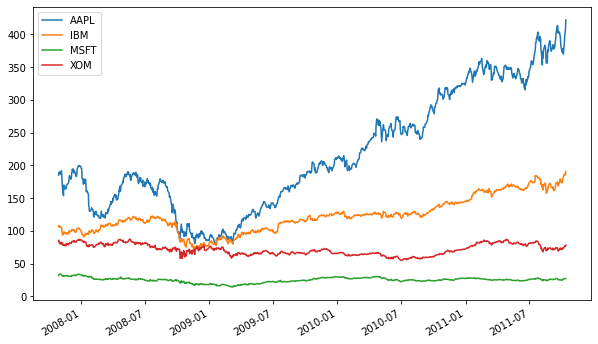

In [93]:
close_px[['AAPL', 'IBM', 'MSFT', 'XOM']].plot() 

In [94]:
close_px.iloc[-1]    # the last row of the data

AA        10.26
AAPL     422.00
GE        16.60
IBM      190.53
JNJ       64.72
MSFT      27.27
PEP       62.24
SPX     1224.58
XOM       78.11
Name: 2011-10-14 00:00:00, dtype: float64

Text(0.5, 1.0, 'Prices on 2011-10-14 00:00:00')

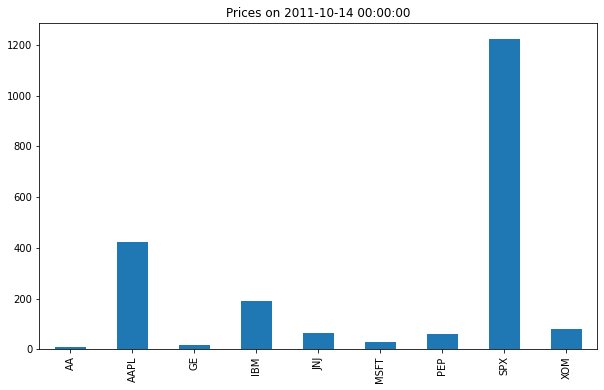

In [98]:
close_px.iloc[-1].plot(kind='bar')    # the last row of the data. in bar plot
plt.title('Prices on %s' % close_px.index[-1])
plt.axhline(0)

Hierarchical indexing
---------------------

In [ ]:
index = MultiIndex(levels=[['foo', 'bar', 'baz', 'qux'],
                                   ['one', 'two', 'three']],
                           labels=[[0, 0, 0, 1, 1, 2, 2, 3, 3, 3],
                                   [0, 1, 2, 0, 1, 1, 2, 0, 1, 2]])
hdf = DataFrame(np.random.randn(10, 3), index=index,
                columns=['A', 'B', 'C'])
hdf

In [ ]:
hdf.loc['foo']

In [ ]:
hdf.loc['foo'] = 0
hdf

In [ ]:
hdf.loc['foo', 'three']

Stacking and unstacking
-----------------------

In [ ]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                'foo', 'foo', 'qux', 'qux'],
               ['one', 'two', 'one', 'two',
                'one', 'two', 'one', 'two']]))
index = MultiIndex.from_tuples(tuples)
columns = MultiIndex.from_tuples([('A', 'cat'), ('B', 'dog'),
                                  ('B', 'cat'), ('A', 'dog')])
df = DataFrame(np.random.randn(8, 4), index=index, columns=columns)
df

In [ ]:
df2 = df.iloc[[0, 1, 2, 4, 5, 7]]
df2

In [ ]:
df.unstack()['B']

GroupBy
=======

In [ ]:
df = DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                       'foo', 'bar', 'foo', 'foo'],
                'B' : ['one', 'one', 'two', 'three',
                       'two', 'two', 'one', 'three'],
                'C' : np.random.randn(8),
                'D' : np.random.randn(8)})
df

In [ ]:
for key, group in df.groupby('A'):
    print(key)
    print(group)

In [ ]:
df.groupby('A')['C'].describe().T

In [ ]:
df.groupby('A').mean()

In [ ]:
df.groupby(['A', 'B']).mean()

In [ ]:
for key, group in df.groupby('A'):
    print(key)
    print(group)

In [ ]:
df.groupby(['A', 'B'], as_index=False).mean()

GroupBy example: linear regression by group
-------------------------------------------

To make this work download statesmodels from [here][ref]. 
Download the whl file and use the installation instractions that were given to you for Basemap.
[ref]:https://pypi.python.org/pypi/statsmodels

In [ ]:
import statsmodels.api as sm
rets = close_px / close_px.shift(1) - 1

def get_beta(rets):
    rets = rets.dropna()
    rets['intercept'] = 1.
    model = sm.OLS(rets['MSFT'], rets.loc[:, ['AAPL', 'intercept']]).fit()
    return model.params

get_beta(rets)

In [ ]:
grouped = rets.groupby([lambda x: x.year, lambda x: x.month])
beta_by_ym = grouped.apply(get_beta)
beta_by_ym

In [ ]:
beta_by_ym.unstack(0)['AAPL']

GroupBy with hierarchical indexing
----------------------------------

In [ ]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                'foo', 'foo', 'qux', 'qux'],
               ['one', 'two', 'one', 'two',
                'one', 'two', 'one', 'two']]))
index = MultiIndex.from_tuples(tuples)
columns = MultiIndex.from_tuples([('A', 'cat'), ('B', 'dog'),
                                  ('B', 'cat'), ('A', 'dog')])
df = DataFrame(np.random.randn(8, 4), index=index, columns=columns)
df

In [ ]:
df.groupby(level=0, axis=0).mean()

In [ ]:
df.stack()

In [ ]:
df.stack().mean(1).unstack()

In [ ]:
# could also have done
df.groupby(level=1, axis=1).mean()